<h1><center>IMDb Movies Recommendation System </center></h1>

<img src="https://ia.media-imdb.com/images/M/MV5BMTk3ODA4Mjc0NF5BMl5BcG5nXkFtZTgwNDc1MzQ2OTE@._V1_.png" width=300> 

## Introduction
**IMDb** is the world's most popular and authoritative source for movie, TV and celebrity content, designed to help fans explore the world of movies and shows and decide what to watch.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab

## Load Dataset

In [2]:
df = pd.read_csv('movies.csv', encoding = 'latin1')
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


# Feature Description

****Analyzing Three Decades of Movies Data.****

The dataset is taken from https://www.kaggle.com/danielgrijalvas/movies

There are 6820 movies in the dataset (220 movies per year, 1986-2016). Each movie has the following attributes:

|Feature Name   |Feature Description     |       
| ------------- |:--------------: | 
| budget      | the budget of the movie. Some movies don't have this, so it appears as 0 | 
| company      | movie production company| 
| country | movie country of origin        | 
| director | director of the movie       | 
| genre | main genre of the movie       | 
| gross | revenue of the movie        | 
| name | name of the movie       | 
| rating | rating of the movie (R, PG, etc.)        | 
| released | release date (YYYY-MM-DD)        | 
| runtime | duration of the movie        | 
| score | IMDb user rating        | 
| votes | number of user votes        | 
| star | main actor/actress        | 
| writer | writer of the movie        | 
| year | year of release        | 


### Exploring the Dataset

In [3]:
df.shape

(6820, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


In [5]:
df.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


In [6]:
dataset = []
for i in df.columns:
    dataset.append([i, 
                      df[i].dtypes, 
                      df[i].isna().sum(), 
                      round((((df[i].isna().sum())/(len(df)))*100),2), 
                      df[i].nunique(), 
                      df[i].drop_duplicates().sample(2).values])
    
pd.DataFrame(dataset, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,budget,float64,0,0.0,351,"[180000000.0, 88000000.0]"
1,company,object,0,0.0,2179,"[Fireworks Pictures, IMF Internationale Medien..."
2,country,object,0,0.0,57,"[Norway, Mexico]"
3,director,object,0,0.0,2759,"[David Zucker, Anurag Kashyap]"
4,genre,object,0,0.0,17,"[Sci-Fi, Western]"
5,gross,float64,0,0.0,6802,"[2700000.0, 265107.0]"
6,name,object,0,0.0,6731,[Sweeney Todd: The Demon Barber of Fleet Stree...
7,rating,object,0,0.0,13,"[R, TV-MA]"
8,released,object,0,0.0,2403,"[1990-09-07, 2006-05-19]"
9,runtime,int64,0,0.0,135,"[162, 173]"


### Cleaning the Dataset

In [7]:
df.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

There is no Nan values found on the dataset.

In [8]:
df['released'] = pd.to_datetime(df.released)
df['released']

0      1986-08-22
1      1986-06-11
2      1986-05-16
3      1986-07-18
4      1986-08-01
          ...    
6815   2016-07-22
6816   2016-05-06
6817   2016-07-25
6818   2016-12-02
6819   2017-07-28
Name: released, Length: 6820, dtype: datetime64[ns]

Changing the 'released' feature into datetime format.

In [9]:
df['year'] = df['released'].dt.year
df.head(3)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986


Creating new feature named 'year' to show what year the movies were released.

### Setting Styles

In [10]:
sns.set(style = 'whitegrid', palette = 'pastel')

### Finding Outliers

In [11]:
df.sort_values('budget',ascending=True).head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6819,0.0,Les Productions du Trésor,France,Nicole Garcia,Drama,37757.0,From the Land of the Moon,R,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2017
1852,0.0,Twentieth Century Fox Film Corporation,USA,Les Mayfield,Family,17193886.0,Miracle on 34th Street,PG,1994-11-18,114,6.4,Richard Attenborough,24126,Valentine Davies,1994
1854,0.0,Morgan Creek Productions,USA,Dennis Hopper,Comedy,1596700.0,Chasers,R,1994-04-22,102,5.0,Tom Berenger,4804,Joe Batteer,1994
1855,0.0,Renn Productions,France,Patrice Chéreau,Biography,2017346.0,Queen Margot,R,1994-12-09,159,7.5,Isabelle Adjani,14377,Alexandre Dumas,1994
5102,0.0,Six Entertainment,Netherlands,Tom Six,Horror,181467.0,The Human Centipede (First Sequence),R,2010-04-28,92,4.4,Dieter Laser,62034,Tom Six,2010


Text(0.5, 1.0, 'Movies Budget Data Distribution')

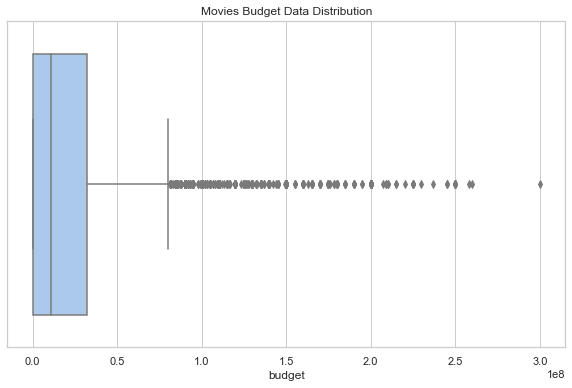

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(df['budget'])
plt.title('Movies Budget Data Distribution')

From the visualization above, it seems like there are lots of outliers found on the 'budget' feature, but as stated above, some movies are made without budget/the budget data is not available. So, I will not modify the data from budget feature.

In [13]:
df.sort_values('score',ascending=True).head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6334,500000.0,Camfam Studios,USA,Darren Doane,Comedy,2783970.0,Saving Christmas,PG,2014-11-14,79,1.5,Kirk Cameron,13059,Darren Doane,2014
1087,0.0,Concorde-New Horizons,Peru,Augusto Tamayo San Román,Action,410880.0,Ultra Warrior,R,1990-03-16,100,1.6,Dack Rambo,661,Len Jenkin,1990
4933,20000000.0,Lionsgate,USA,Jason Friedberg,Comedy,14190901.0,Disaster Movie,PG-13,2008-08-29,87,1.9,Carmen Electra,78142,Jason Friedberg,2008
4987,9000000.0,Purple Pictures,USA,Tom Putnam,Comedy,27696.0,The Hottie & the Nottie,PG-13,2008-02-21,91,1.9,Paris Hilton,34253,Heidi Ferrer,2008
4111,20000000.0,ApolloMedia Distribution,Germany,Bob Clark,Comedy,9109322.0,Superbabies: Baby Geniuses 2,PG,2004-08-27,88,2.0,Jon Voight,26818,Steven Paul,2004


Text(0.5, 1.0, 'Movies Score Data Distribution')

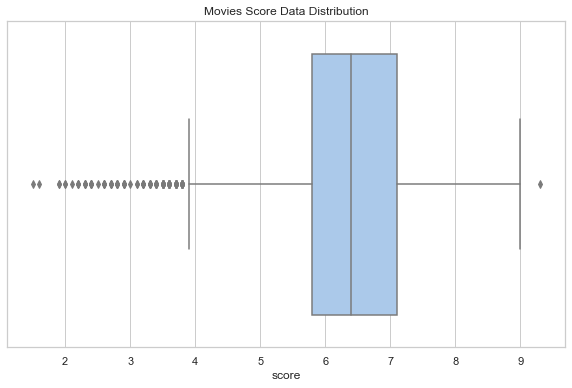

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(df['score'])
plt.title('Movies Score Data Distribution')

Outliers are also found in the 'score' feature. Score is the rating that is given by IMDb members based on their experience with the movies, the range is from 1 to 10, with 1 is the lowest while 10 is the highest. I will not modify the outliers from this feature because it will make the data less accurate.

In [15]:
df.sort_values('gross',ascending=True).head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6784,0.0,Magic Lantern,Spain,Carles Torrens,Horror,70.0,Pet,R,2016-12-02,94,5.7,Dominic Monaghan,10504,Jeremy Slater,2016
2594,15000000.0,Daybreak,USA,George Huang,Comedy,309.0,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997
6066,0.0,Cinetel Films,USA,Steven R. Monroe,Crime,441.0,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2014
5699,0.0,Isle of Man Film,UK,Sheree Folkson,Comedy,542.0,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2012
5917,0.0,Zentropa International Norway,Norway,Petter Næss,Action,547.0,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2013


Text(0.5, 1.0, 'Movies Gross Revenue Data Distribution')

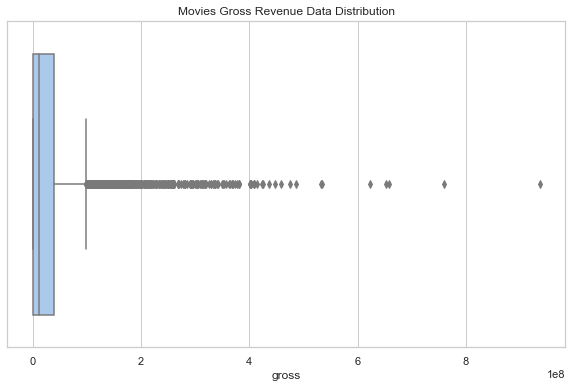

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(df['gross'])
plt.title('Movies Gross Revenue Data Distribution')

Outliers are also found in the 'gross' feature. Gross is the gross revenue gained by the production company from the movies they created. It could come from ticket sales, merchandise sales, and so on. I will not modify the outliers from this feature because it will make the data less accurate.

In [17]:
df.sort_values('votes',ascending=True).head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
1077,0.0,Sharmhill Productions,Canada,Steven Hilliard Stern,Crime,10468.0,Love & Murder,R,1991-11-08,87,4.4,Todd Waring,27,Steven Hilliard Stern,1991
213,0.0,Grace,USA,Dominic Orlando,Action,601451.0,Knights of the City,R,1986-02-14,87,4.8,Leon Isaac Kennedy,103,Leon Isaac Kennedy,1986
1093,0.0,British Broadcasting Corporation (BBC),UK,James Scott,Comedy,541626.0,Strike It Rich,PG,1990-01-26,87,5.1,Robert Lindsay,125,Graham Greene,1990
1096,0.0,Bonkers,USA,Dyan Cannon,Drama,115983.0,The End of Innocence,R,1991-09-05,100,5.6,Dyan Cannon,139,Dyan Cannon,1991
215,0.0,Hunter/MFG Production,USA,Gary Grillo,Action,492367.0,Jackals,R,1986-09-19,97,5.3,Jack Lucarelli,139,Dennis A. Pratt,1986


Text(0.5, 1.0, 'Movies Votes Data Distribution')

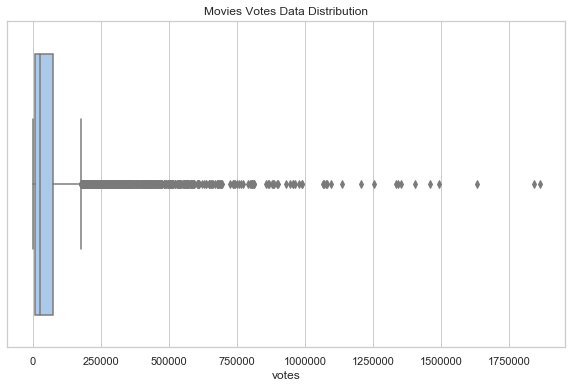

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(df['votes'])
plt.title('Movies Votes Data Distribution')

Outliers are also once again found on the 'votes' feature. Then again, I will not modify the data from this feature because it will make the data less accurate.

In [19]:
# def find_outlier(yourList):
#     Q1 = np.quantile(yourList, .25)
#     Q2 = np.quantile(yourList, .50)
#     Q3 = np.quantile(yourList, .75)

#     IQR = (Q3 - Q1) * 1.5
#     batas_bawah = Q1 - IQR
#     batas_atas = Q3 + IQR
    
#     outlier = ''
#     for i in range(len(yourList)):
#         if yourList[i] > batas_atas:
#             outlier = outlier + str(yourList[i]) + ', '
#         if yourList[i] < batas_bawah:
#             outlier = outlier + str(yourList[i]) + ', '
#     return outlier

In [20]:
# budget = df['budget'].sort_values().values.tolist()
# score = df['score'].sort_values().values.tolist()
# gross = df['gross'].sort_values().values.tolist()
# votes = df['votes'].sort_values().values.tolist()

# print("Outliers found in 'budget' feature:", len(find_outlier(budget)))
# print("Outliers found in 'score' feature:", len(find_outlier(score)))
# print("Outliers found in 'gross' feature:", len(find_outlier(gross)))
# print("Outliers found in 'votes' feature:", len(find_outlier(votes)))

In [21]:
Q1_amount = df['budget'].describe()['25%']
Q3_amount = df['budget'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = df[(df['budget'] < Q1_amount - (1.5 * iqr)) | (df['budget']> Q3_amount + (1.5 * iqr)) ].index

df.loc[outlier_index]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
1101,102000000.0,Carolco Pictures,USA,James Cameron,Action,204843350.0,Terminator 2: Judgment Day,R,1991-07-03,137,8.5,Arnold Schwarzenegger,813779,James Cameron,1991
1558,85000000.0,Columbia Pictures Corporation,USA,John McTiernan,Action,50016394.0,Last Action Hero,PG-13,1993-06-18,130,6.3,Arnold Schwarzenegger,114476,Zak Penn,1993
1774,115000000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,146282411.0,True Lies,R,1994-07-15,141,7.2,Arnold Schwarzenegger,202934,Claude Zidi,1994
1989,100000000.0,Warner Bros.,USA,Joel Schumacher,Action,184031112.0,Batman Forever,PG-13,1995-06-16,121,5.4,Val Kilmer,203965,Bob Kane,1995
2002,90000000.0,Cinergi Pictures Entertainment,USA,John McTiernan,Action,100012499.0,Die Hard with a Vengeance,R,1995-05-19,128,7.6,Bruce Willis,317792,Jonathan Hensleigh,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6722,170000000.0,Walt Disney Pictures,USA,James Bobin,Adventure,77042381.0,Alice Through the Looking Glass,PG,2016-05-27,113,6.2,Mia Wasikowska,62895,Linda Woolverton,2016
6730,105000000.0,Blue Sky Studios,USA,Mike Thurmeier,Animation,64063008.0,Ice Age: Collision Course,PG,2016-07-22,94,5.7,Ray Romano,38556,Michael J. Wilson,2016
6736,125000000.0,Disruption Entertainment,USA,Chris Wedge,Action,33370166.0,Monster Trucks,PG,2017-01-13,104,5.7,Lucas Till,9244,Derek Connolly,2017
6740,140000000.0,Walt Disney Pictures,USA,Steven Spielberg,Adventure,55483770.0,The BFG,PG,2016-07-01,117,6.4,Mark Rylance,56297,Melissa Mathison,2016


In [22]:
Q1_amount = df['score'].describe()['25%']
Q3_amount = df['score'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index1 = df[(df['score'] < Q1_amount - (1.5 * iqr)) | (df['score']> Q3_amount + (1.5 * iqr)) ].index

df.loc[outlier_index1]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
43,10000000.0,De Laurentiis Entertainment Group (DEG),USA,John Guillermin,Action,4711220.0,King Kong Lives,PG-13,1986-12-19,105,3.8,Brian Kerwin,4401,Ronald Shusett,1986
126,17000000.0,HandMade Films,UK,Jim Goddard,Adventure,2315683.0,Shanghai Surprise,PG-13,1986-08-29,97,3.1,Sean Penn,4339,John Kohn,1986
132,0.0,TMS Pictures,Canada,George Mendeluk,Comedy,2147228.0,Meatballs III: Summer Job,R,1987-01-09,96,3.3,Sally Kellerman,2003,Janis Allen,1987
152,0.0,Chroma III Productions,USA,Mark Griffiths,Comedy,78068.0,Hardbodies 2,R,1986-09-12,88,2.9,James Karen,895,Mark Griffiths,1986
203,0.0,Action Communications,USA,Frank Harris,Action,63860.0,Low Blow,R,1986-04-01,100,3.5,Leo Fong,256,Leo Fong,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5822,5000000.0,Dimension Films,USA,John Gulager,Comedy,376512.0,Piranha 3DD,R,2012-05-11,83,3.8,Danielle Panabaker,34111,Patrick Melton,2012
5925,0.0,Enrique Cerezo Producciones Cinematográficas S.A.,Italy,Dario Argento,Horror,8139.0,Dracula 3D,NOT RATED,2013-10-04,110,3.6,Thomas Kretschmann,3321,Dario Argento,2013
6078,20000000.0,Dimension Films,USA,Malcolm D. Lee,Comedy,32015787.0,Scary Movie 5,PG-13,2013-04-12,88,3.5,Simon Rex,54324,David Zucker,2013
6290,16000000.0,Stoney Lake Entertainment,USA,Vic Armstrong,Action,13998282.0,Left Behind,PG-13,2014-10-03,110,3.1,Nicolas Cage,28203,Jerry B. Jenkins,2014


In [23]:
Q1_amount = df['gross'].describe()['25%']
Q3_amount = df['gross'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index2 = df[(df['gross'] < Q1_amount - (1.5 * iqr)) | (df['gross']> Q3_amount + (1.5 * iqr)) ].index

df.loc[outlier_index2]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1987
10,8800000.0,Rimfire Films,Australia,Peter Faiman,Adventure,174635000.0,Crocodile Dundee,PG-13,1986-09-26,97,6.5,Paul Hogan,79465,Ken Shadie,1986
24,25000000.0,Paramount Pictures,USA,Leonard Nimoy,Adventure,109713132.0,Star Trek IV: The Voyage Home,PG,1986-11-26,119,7.3,William Shatner,66366,Gene Roddenberry,1986
35,0.0,Columbia Pictures Corporation,USA,John G. Avildsen,Action,115103979.0,The Karate Kid Part II,PG,1986-06-20,113,5.9,Pat Morita,58370,Robert Mark Kamen,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6687,200000000.0,Pixar Animation Studios,USA,Andrew Stanton,Animation,486295561.0,Finding Dory,PG,2016-06-17,97,7.4,Ellen DeGeneres,173005,Andrew Stanton,2016
6692,165000000.0,Twentieth Century Fox Film Corporation,USA,Roland Emmerich,Action,103144286.0,Independence Day: Resurgence,PG-13,2016-06-24,120,5.3,Liam Hemsworth,137119,Nicolas Wright,2016
6693,50000000.0,New Line Cinema,USA,Rawson Marshall Thurber,Action,127440871.0,Central Intelligence,PG-13,2016-06-17,107,6.3,Dwayne Johnson,106773,Ike Barinholtz,2016
6750,73000000.0,Columbia Pictures,Finland,Clay Kaytis,Animation,107509366.0,The Angry Birds Movie,PG,2016-05-20,97,6.3,Jason Sudeikis,59472,Jon Vitti,2016


In [24]:
Q1_amount = df['votes'].describe()['25%']
Q3_amount = df['votes'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index3 = df[(df['votes'] < Q1_amount - (1.5 * iqr)) | (df['votes']> Q3_amount + (1.5 * iqr)) ].index

df.loc[outlier_index3]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6630,150000000.0,Walt Disney Pictures,USA,Byron Howard,Animation,341268248.0,Zootopia,PG,2016-03-04,108,8.0,Ginnifer Goodwin,317549,Byron Howard,2016
6646,50000000.0,Misty Mountains,USA,Shane Black,Comedy,36261763.0,The Nice Guys,R,2016-05-20,116,7.4,Russell Crowe,193151,Shane Black,2016
6671,15000000.0,Paramount Pictures,USA,Dan Trachtenberg,Drama,71897215.0,10 Cloverfield Lane,PG-13,2016-03-11,104,7.2,John Goodman,208655,Josh Campbell,2016
6673,160000000.0,Legendary Entertainment,China,Duncan Jones,Action,47365290.0,Warcraft: The Beginning,PG-13,2016-06-10,123,6.9,Travis Fimmel,197373,Charles Leavitt,2016


In [25]:
print("Outliers found in 'budget' feature:", (outlier_index.shape[0]))
print("Outliers found in 'score' feature:", (outlier_index1.shape[0]))
print("Outliers found in 'gross' feature:", (outlier_index2.shape[0]))
print("Outliers found in 'votes' feature:", (outlier_index3.shape[0]))

Outliers found in 'budget' feature: 479
Outliers found in 'score' feature: 112
Outliers found in 'gross' feature: 618
Outliers found in 'votes' feature: 717


### Data Distribution

<Figure size 1440x648 with 0 Axes>

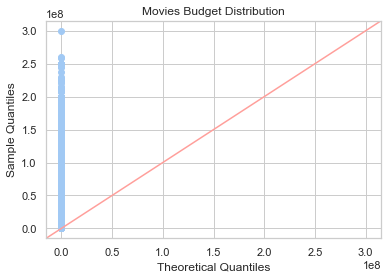

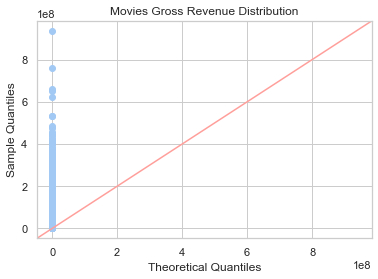

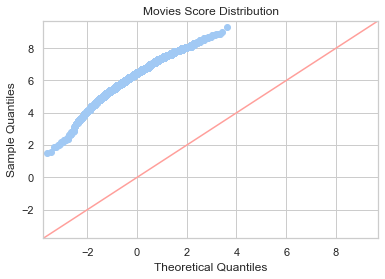

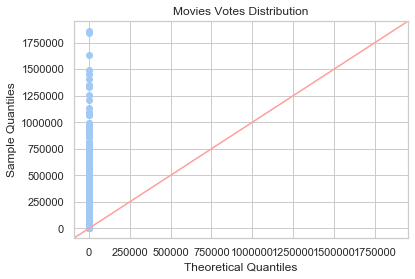

In [26]:
plt.figure(figsize=(20,9))

sm.qqplot(df['budget'], line = '45')
plt.title('Movies Budget Distribution')
sm.qqplot(df['gross'], line = '45')
plt.title('Movies Gross Revenue Distribution')
sm.qqplot(df['score'], line = '45')
plt.title('Movies Score Distribution')
sm.qqplot(df['votes'], line = '45')
plt.title('Movies Votes Distribution')
pylab.show()

Based on the visualizations from qqplot above, they conclude that 'budget', 'gross', 'score', and 'votes' features are not normally distributed.

In [27]:
df[['budget','gross']] = df[['budget','gross']].astype('int')
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


I changed the dtype of 'budget' and 'gross' from float to integer because I think float is not necessary, where the last number of those features are .0. Changing them to integer would make the dataset look more compact and neater/tidier.

### Creating New Dataset that Has Already Been Cleaned

In [28]:
# Cleaned Dataset
# df.to_csv('movies_cleaned.csv',index=False)